In [6]:
import tensorflow as tf 
import tensorflow.examples.tutorials.mnist.input_data as input_data

#加载mnist数据
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)     

#输入的数据和标签的占位符
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784])
    y_labels = tf.placeholder(tf.float32, shape=[None, 10])


#初始化权重
def weight_var(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
#初始化偏差
def bias_var(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

#卷积
def convolution(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
#最大池化
def maxPool2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#进行卷积

x_image = tf.reshape(x, [-1, 28, 28, 1])

##一层卷积
Wconvo1 = weight_var([5, 5, 1, 32])
bconvo1 = bias_var([32])

hconvo1 = tf.nn.relu(convolution(x_image, Wconvo1) + bconvo1)
hpool1 = maxPool2x2(hconvo1)
##二层卷积
Wconvo2 = weight_var([5, 5, 32, 64])
bconvo2 = bias_var([64])

hconvo2 = tf.nn.relu(convolution(hpool1, Wconvo2) + bconvo2)
hpool2 = maxPool2x2(hconvo2)

#密集连接层
Wfc1 = weight_var([7 * 7 * 64, 1024])
bfc1 = bias_var([1024])

hpool2flat = tf.reshape(hpool2, [-1, 7*7*64])
hfc1 = tf.nn.relu(tf.matmul(hpool2flat, Wfc1) + bfc1)

#防止过拟合操作dropout
keep_prob = tf.placeholder("float")
hfc1drop = tf.nn.dropout(hfc1, keep_prob)

#output layer
Wfc2 = weight_var([1024, 10])
bfc2 = bias_var([10])


y_conv = tf.nn.softmax(tf.matmul(hfc1drop, Wfc2) + bfc2)
cross_entropy = -tf.reduce_sum(y_labels*tf.log(y_conv))
tf.summary.scalar('loss', cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_labels, 1))
#准确度计算
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
tf.summary.scalar('accuracy', accuracy)

# with tf.name_scope('train'):
#梯度下降
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    merged = tf.summary.merge_all()
    summary_writer = tf.summary.FileWriter('tmp/graph', graph=sess.graph)
    for i in range(300):
        batch = mnist.train.next_batch(50)
        if i%10 == 0:
            trainAccuracy = accuracy.eval(feed_dict={
                x: batch[0], y_labels: batch[1], keep_prob: 1.0
            })
            print("[step %d] , [训练正确率]:%g" % (i, trainAccuracy))
            summary,_ = sess.run([merged, train_step], 
                                 feed_dict={x: batch[0], y_labels: batch[1], keep_prob: 1.0})
            summary_writer.add_summary(summary, i)
        train_step.run(feed_dict={x: batch[0], y_labels: batch[1], keep_prob: 0.5})
    tf.train.Saver().save(sess, save_path='tmp/graph', global_step=1)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
[step 0] , [训练正确率]:0.04
[step 10] , [训练正确率]:0.32
[step 20] , [训练正确率]:0.62
[step 30] , [训练正确率]:0.7
[step 40] , [训练正确率]:0.76
[step 50] , [训练正确率]:0.64
[step 60] , [训练正确率]:0.74
[step 70] , [训练正确率]:0.76
[step 80] , [训练正确率]:0.74
[step 90] , [训练正确率]:0.8
[step 100] , [训练正确率]:0.66
[step 110] , [训练正确率]:0.78
[step 120] , [训练正确率]:0.8
[step 130] , [训练正确率]:0.8
[step 140] , [训练正确率]:0.74
[step 150] , [训练正确率]:0.84
[step 160] , [训练正确率]:0.86
[step 170] , [训练正确率]:0.78
[step 180] , [训练正确率]:0.76
[step 190] , [训练正确率]:0.88
[step 200] , [训练正确率]:0.86
[step 210] , [训练正确率]:0.84
[step 220] , [训练正确率]:0.76
[step 230] , [训练正确率]:0.84
[step 240] , [训练正确率]:0.86
[step 250] , [训练正确率]:0.8
[step 260] , [训练正确率]:0.84
[step 270] , [训练正确率]:0.74
[step 280] , [训练正确率]

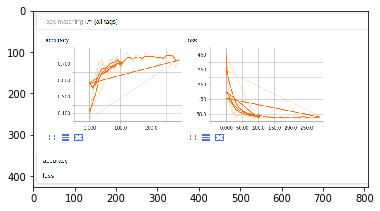

In [21]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('graph.png')

plt.figure('tensorboard_graph')
plt.imshow(img)
plt.show()